In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('online_retail.csv')
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2022-12-01 08:26:00       3.39     17850.0  United Kingdom

In [3]:
data.shape

(541909, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [6]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
print(f'% of Description Missing value : {((data['Description'].isnull().sum()) / len(data)) * 100}')
print(f'% of CustomerID Missing value : {((data['CustomerID'].isnull().sum()) / len(data)) * 100}')

% of Description Missing value : 0.2683107311375157
% of CustomerID Missing value : 24.926694334288598


The Missing Column are Description and CustomerID.

Description is missing 0.2 % of total dataset

CustomerID is missing 24.9 % of total dataset

In [8]:
data.duplicated().sum()

np.int64(5268)

In [9]:
print(f'% of Duplicate value : {((data.duplicated().sum()) / len(data)) * 100}')

% of Duplicate value : 0.9721189350979592


% of Duplicate  values 0.9 % of total dataset

In [10]:
data[data['CustomerID'].isnull()]

InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

                InvoiceDate  UnitPrice  CustomerID         Country  
622     2022-12-01 11:52:00       0.00         NaN  United Kingdom  
1443    2022-12-01 14:32:00       2.51         NaN  United Kingdom  
1444    2022-12-01 14:32:00       2.51         NaN  United Kingdom  
1445    2022-12-01 14:32:00       0.85         NaN  United Kingdom  
1446    2022-12-01 14:32:00       1.66         NaN  United Kingdom  
...                     ...        ...         ...             ...  
541536  2023-12-09 10:26:00       4.13         NaN  United Kingdom  
541537  2023-12-09 10:26:00       4.13         NaN  United Kingdom  
541538  2023-12-09 10:26:00       4.96         NaN  United Kingdom  
541539  2023-12-09 10:26:00      10.79         NaN  United Kingdom  
541540  2023-12-09 10:26:00    1714.17         NaN  United Kingdom  

[135080 rows x 8 columns]

In [11]:
for col in data.columns:
  print(f"{col}:\n Unique values:",data[col].nunique(),"\n", data[col].unique())
  print()
  print()

InvoiceNo:
 Unique values: 25900 
 ['536365' '536366' '536367' ... '581585' '581586' '581587']


StockCode:
 Unique values: 4070 
 ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']


Description:
 Unique values: 4223 
 ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']


Quantity:
 Unique values: 722 
 [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -

In [12]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [13]:
data = data[~data['InvoiceNo'].astype(str).str.startswith('C')]

In [14]:
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [15]:
data[data['CustomerID'].notna()]

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2023-12-09 12:50:00       0.85     12680.0          France  
541905 2023-12-09 12:50:00       2.10     12680.0          France  
541906 2023-12-09 12:50:00       4.15     12680.0          France  
541907 2023-12-09 12:50:00       4.15     12680.0          France  
541908 2023-12-09 12:50:00       4.95     12680.0          France  

[397884 rows x 8 columns]

In [16]:
d1 = data[data["CustomerID"].astype(str).str.strip() != '']

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


## EDA

In [18]:
numerical_col = ['Quantity','UnitPrice','CustomerID']
nume_corr = data[numerical_col].corr()
nume_corr

Quantity  UnitPrice  CustomerID
Quantity    1.000000  -0.003773   -0.006232
UnitPrice  -0.003773   1.000000   -0.010873
CustomerID -0.006232  -0.010873    1.000000

In [19]:
country_order_count = data['Country'].value_counts().sort_values(ascending=False)
country_order_count

Country
United Kingdom          485123
Germany                   9040
France                    8407
EIRE                      7890
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1966
Portugal                  1501
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57


In [20]:
type(country_order_count)

pandas.core.series.Series

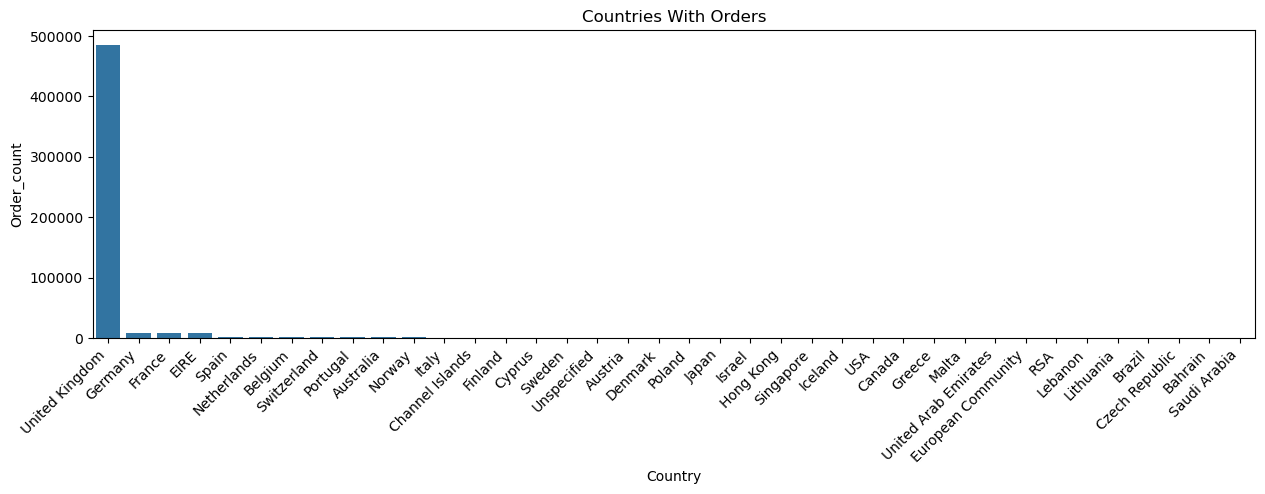

In [21]:
plt.figure(figsize= (15,4))
sns.barplot(x=country_order_count.index,y=country_order_count.values)
plt.title("Countries With Orders")
plt.xlabel('Country')
plt.ylabel('Order_count')
plt.xticks(rotation=45,ha='right')
plt.show()

In [22]:
grouped_description = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
grouped_description

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
                                      ...  
BLUE NEW BAROQUE FLOCK CANDLESTICK        1
PINK FEATHER CHRISTMAS DECORATION         1
SET/6 IVORY BIRD T-LIGHT CANDLES          1
PINK CRYSTAL GUITAR PHONE CHARM           1
*Boombox Ipod Classic                     1
Name: Quantity, Length: 4026, dtype: int64

In [23]:
type(grouped_description)

pandas.core.series.Series

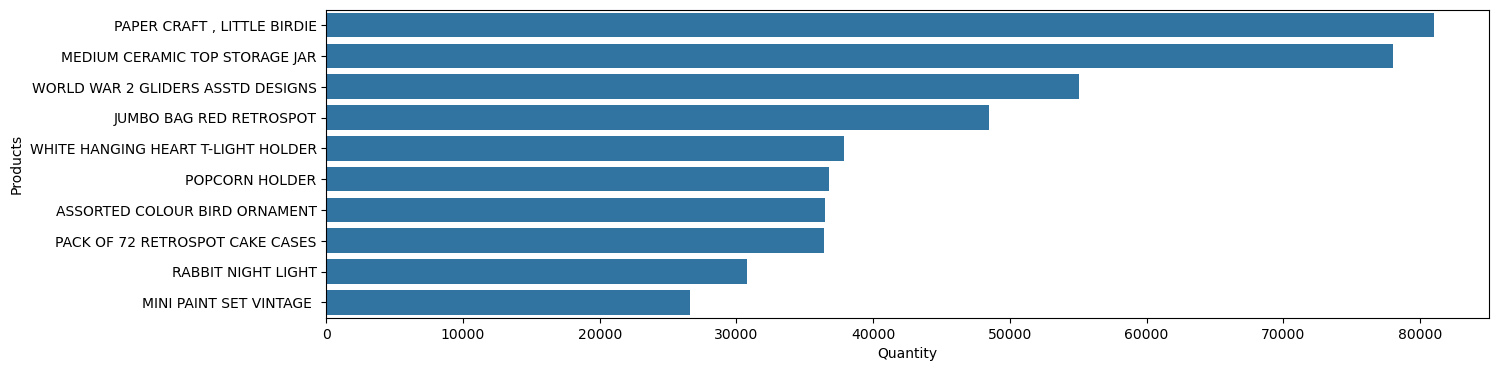

In [24]:
plt.figure(figsize=(15,4))
sns.barplot(x=grouped_description.head(10).values,y=grouped_description.head(10).index)
plt.ylabel('Products')
plt.xlabel('Quantity')
plt.show()

In [25]:
year = data['InvoiceDate'].dt.year
print(year.unique())

[2022 2023]


In [26]:
# Group by year and calculate the sum of 'value' for each year
yearly_sum = data.groupby(year)['CustomerID'].nunique()
print(yearly_sum)

InvoiceDate
2022     885
2023    4219
Name: CustomerID, dtype: int64


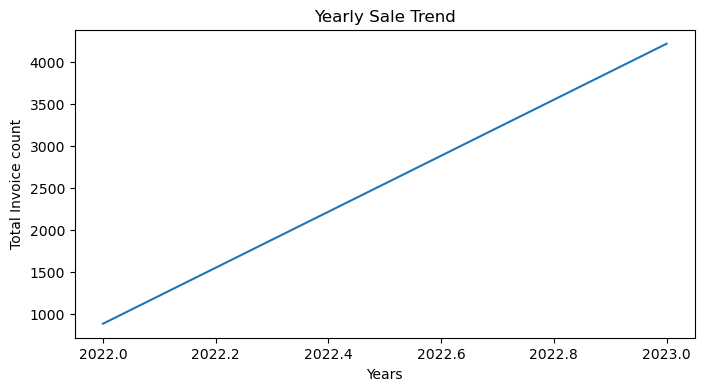

In [27]:
plt.figure(figsize=(8,4))
sns.lineplot(x=yearly_sum.index,y= yearly_sum.values)
plt.title('Yearly Sale Trend')
plt.xlabel('Years')
plt.ylabel('Total Invoice count')
plt.show()

In [28]:
# Group by month and calculate the sum of 'value' for each month
monthly_sum = data.groupby([data['InvoiceDate'].dt.month])['CustomerID'].nunique()
print(monthly_sum)

InvoiceDate
1      741
2      758
3      974
4      856
5     1056
6      991
7      949
8      935
9     1266
10    1364
11    1664
12    1265
Name: CustomerID, dtype: int64


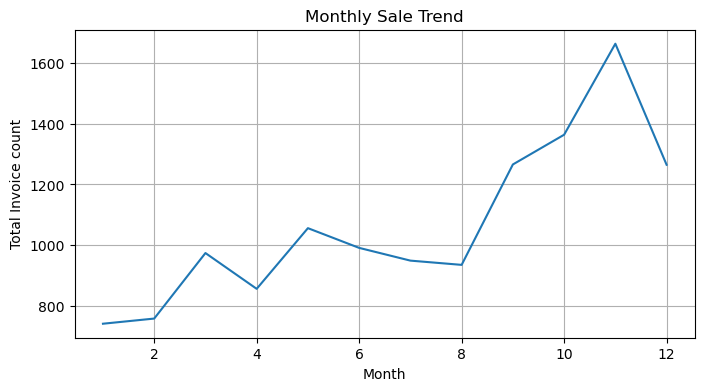

In [29]:
plt.figure(figsize=(8,4))
sns.lineplot(x=monthly_sum.index,y=monthly_sum.values)
plt.title('Monthly Sale Trend')
plt.xlabel('Month')
plt.ylabel('Total Invoice count')
plt.grid()
plt.show()

In [30]:
data['Total_amount'] = data['Quantity'] * data['UnitPrice']

In [31]:
customer_total = data.groupby(['CustomerID'])['Total_amount'].sum()
customer_total

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: Total_amount, Length: 4338, dtype: float64

In [32]:
customer_total = customer_total.sort_values(ascending=False)
customer_total

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
             ...    
16878.0        13.30
17956.0        12.75
16454.0         6.90
14792.0         6.20
16738.0         3.75
Name: Total_amount, Length: 4338, dtype: float64

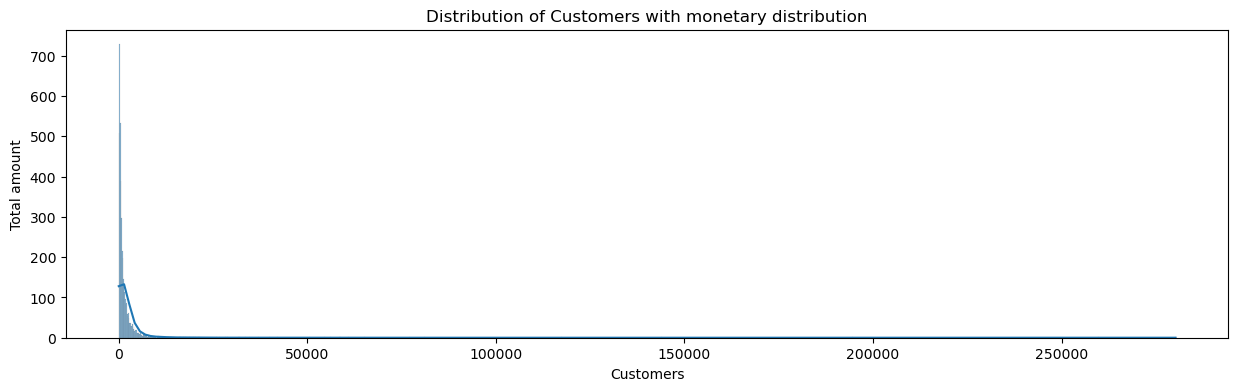

In [33]:
plt.figure(figsize=(15,4))
sns.histplot(x=customer_total.values,kde=True)
plt.title('Distribution of Customers with monetary distribution')
plt.xlabel('Customers')
plt.ylabel('Total amount')
plt.show()

In [34]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Total_amount'],
      dtype='object')

In [35]:
rfm = pd.DataFrame()
rfm['Recency'] = data.groupby('CustomerID').agg({'InvoiceDate':lambda x :(data['InvoiceDate'].max() - x.max()).days})
rfm['Frequency'] = data.groupby('CustomerID').agg({'InvoiceNo':'nunique'})
rfm['Monetary'] = data.groupby('CustomerID').agg({'Total_amount':'sum'})

In [36]:
rfm.head()

Recency  Frequency  Monetary
CustomerID                              
12346.0         325          1  77183.60
12347.0           1          7   4310.00
12348.0          74          4   1797.24
12349.0          18          1   1757.55
12350.0         309          1    334.40

In [37]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   int64  
 1   Frequency  4338 non-null   int64  
 2   Monetary   4338 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


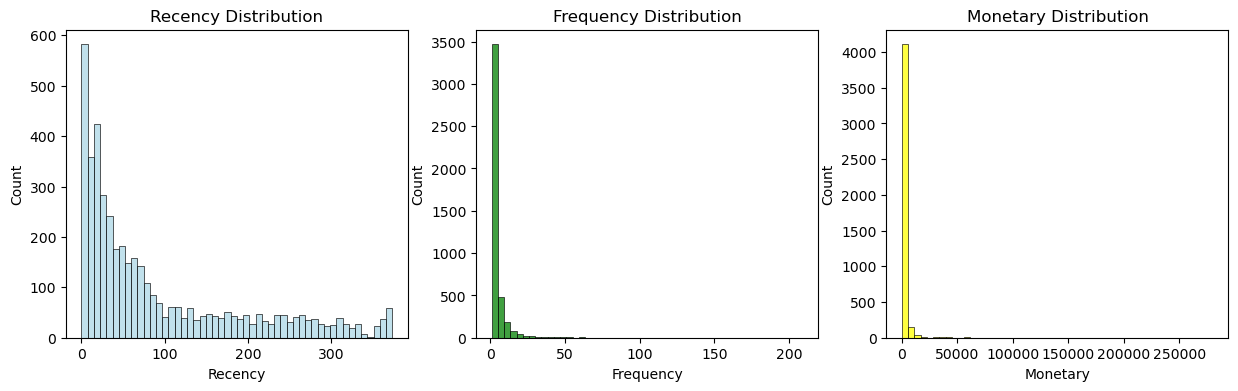

In [38]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title('Recency Distribution')
sns.histplot(data = rfm,x='Recency',bins=50,color='lightblue')

plt.subplot(1,3,2)
plt.title('Frequency Distribution')
sns.histplot(data = rfm,x='Frequency',bins=50,color='green')

plt.subplot(1,3,3)
plt.title('Monetary Distribution')
sns.histplot(data = rfm,x='Monetary',bins=50,color='yellow')
plt.show()

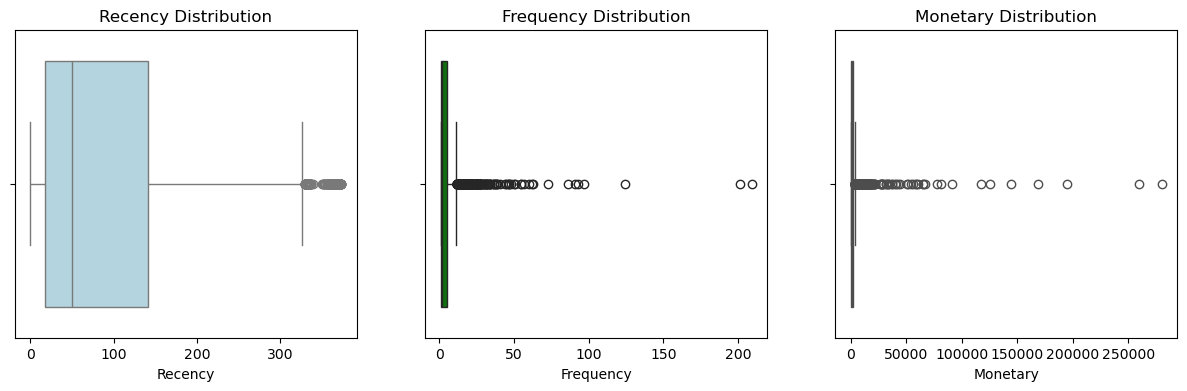

In [39]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title('Recency Distribution')
sns.boxplot(data = rfm,x='Recency',color='lightblue')

plt.subplot(1,3,2)
plt.title('Frequency Distribution')
sns.boxplot(data = rfm,x='Frequency',color='green')

plt.subplot(1,3,3)
plt.title('Monetary Distribution')
sns.boxplot(data = rfm,x='Monetary',color='yellow')
plt.show()

In [40]:
def IQR(col):
    q1=rfm[col].quantile(0.25)
    q3=rfm[col].quantile(0.75)
    IQR = q3-q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    rfm[col] = np.clip(rfm[col],lower_bound,upper_bound)

IQR('Recency')
IQR('Frequency')
IQR('Monetary')

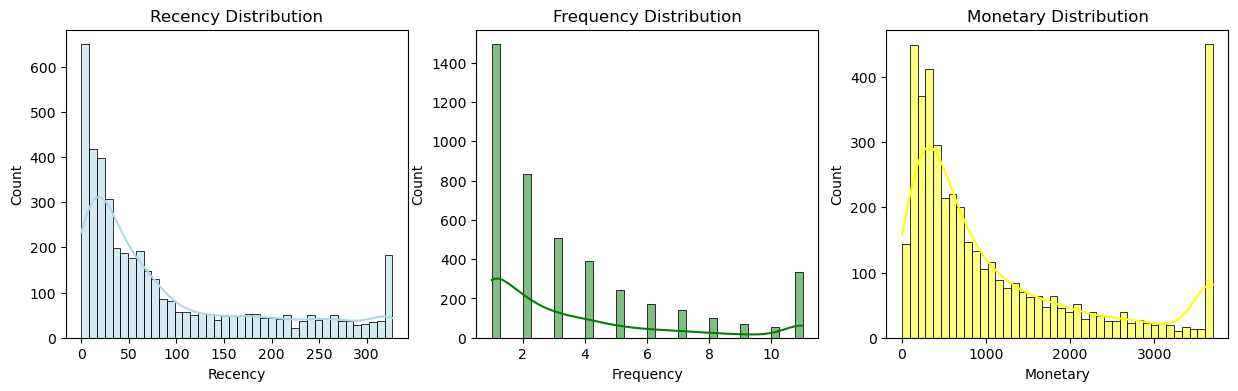

In [41]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title('Recency Distribution')
sns.histplot(data = rfm,x='Recency',bins=40,kde=True,color='lightblue')

plt.subplot(1,3,2)
plt.title('Frequency Distribution')
sns.histplot(data = rfm,x='Frequency',bins=40,kde=True,color='green')

plt.subplot(1,3,3)
plt.title('Monetary Distribution')
sns.histplot(data = rfm,x='Monetary',bins=40,kde=True,color='yellow')
plt.show()

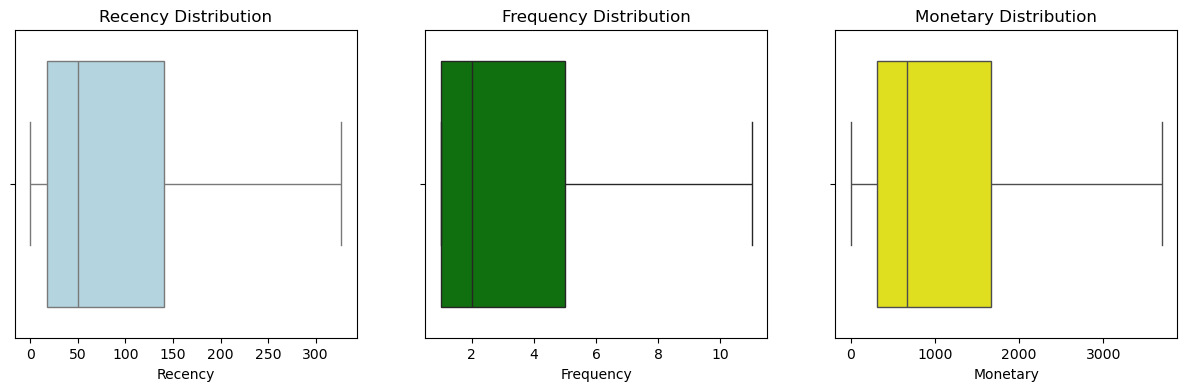

In [42]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title('Recency Distribution')
sns.boxplot(data = rfm,x='Recency',color='lightblue')

plt.subplot(1,3,2)
plt.title('Frequency Distribution')
sns.boxplot(data = rfm,x='Frequency',color='green')

plt.subplot(1,3,3)
plt.title('Monetary Distribution')
sns.boxplot(data = rfm,x='Monetary',color='yellow')
plt.show()

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## Elbow Method

In [44]:
rfm.head()

Recency  Frequency   Monetary
CustomerID                               
12346.0         325          1  3693.2275
12347.0           1          7  3693.2275
12348.0          74          4  1797.2400
12349.0          18          1  1757.5500
12350.0         309          1   334.4000

In [45]:
rfm.shape

(4338, 3)

In [46]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
print(rfm_scaled)

[[ 2.41338159 -0.81803497  2.20422377]
 [-0.92035154  1.15580523  2.20422377]
 [-0.16923265  0.16888513  0.55257938]
 ...
 [-0.85861574 -0.4890616  -0.85793945]
 [-0.89977294  2.4716987   0.81186139]
 [-0.49849025 -0.16008824  0.58745928]]


C:\Users\SDP87\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\SDP87\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\SDP87\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SDP87\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

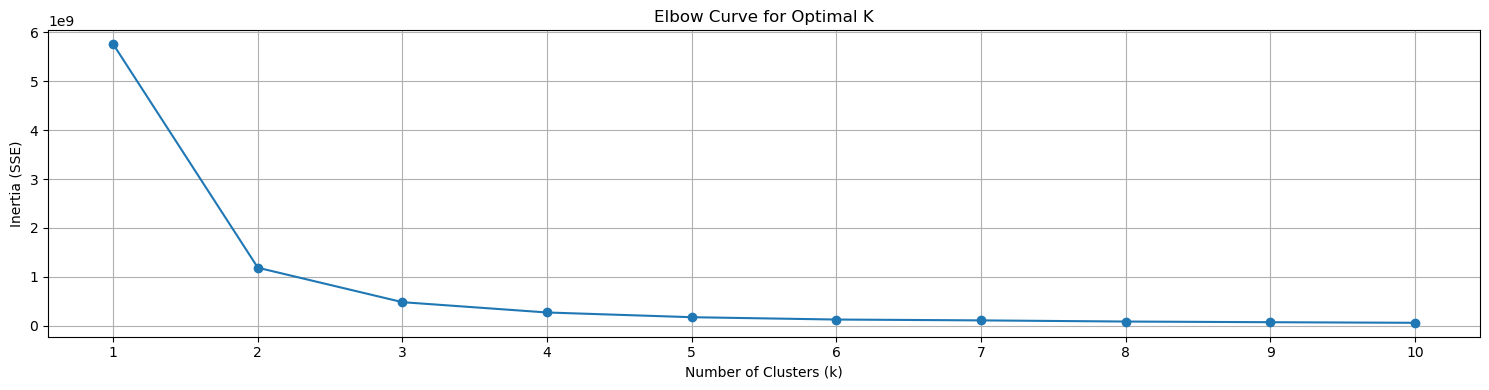

In [47]:
inertia = []
K_range = range(1,11)
for k in K_range:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(rfm)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15,4))
plt.plot(K_range,inertia,marker='o')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
kmeans = KMeans(n_clusters=4,random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm)

In [49]:
rfm.head()

Recency  Frequency   Monetary  Cluster
CustomerID                                        
12346.0         325          1  3693.2275        1
12347.0           1          7  3693.2275        1
12348.0          74          4  1797.2400        2
12349.0          18          1  1757.5500        2
12350.0         309          1   334.4000        0

In [50]:
cluster_summary  = rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean().round(2)
cluster_summary

Recency  Frequency  Monetary
Cluster                              
0         127.81       1.62    338.61
1          28.22       8.58   3576.39
2          44.02       5.83   2167.09
3          65.09       3.54   1102.47

In [51]:
cluster_labels = {
    0: 'At-Risk',
    1: 'High-Value',
    2: 'Regular',
    3: 'Occasional'
}

rfm['Segment'] = rfm['Cluster'].map(cluster_labels)

In [52]:
rfm.head()

Recency  Frequency   Monetary  Cluster     Segment
CustomerID                                                    
12346.0         325          1  3693.2275        1  High-Value
12347.0           1          7  3693.2275        1  High-Value
12348.0          74          4  1797.2400        2     Regular
12349.0          18          1  1757.5500        2     Regular
12350.0         309          1   334.4000        0     At-Risk

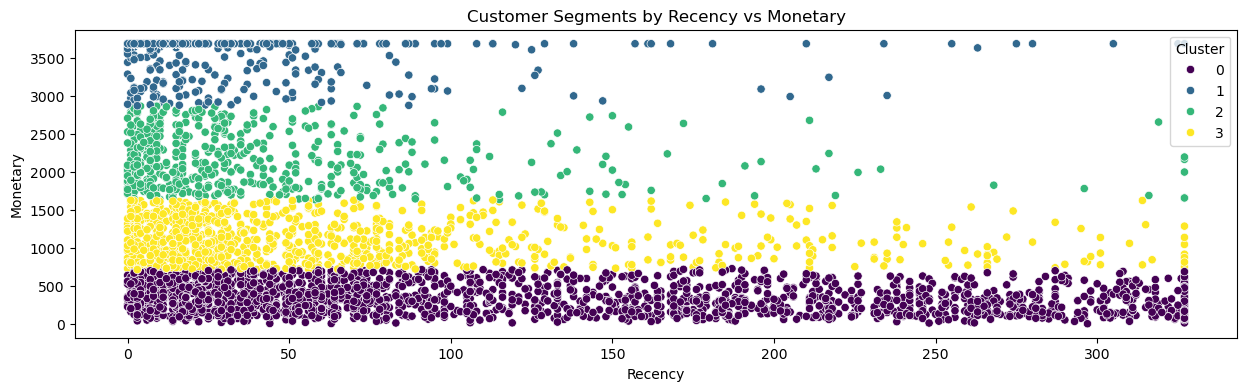

In [53]:
plt.figure(figsize=(15,4))
sns.scatterplot(data=rfm, x='Recency',y='Monetary',hue='Cluster', palette='viridis')
plt.title('Customer Segments by Recency vs Monetary')
plt.show()

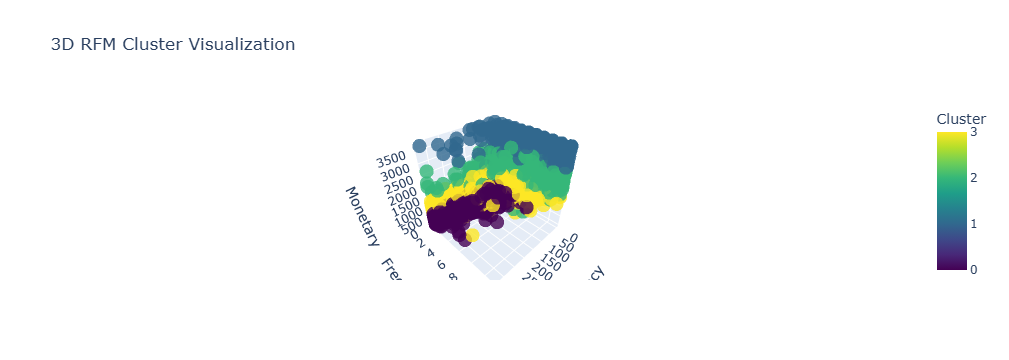

In [54]:
fig = px.scatter_3d(
    rfm,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='Cluster',  # or use 'Segment' if you've labeled clusters
    title='3D RFM Cluster Visualization',
    opacity=0.8,
    color_continuous_scale='viridis'
)

fig.show()

In [55]:
silhouette_scores = []
K_range = range(2,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k,random_state=42,n_init = 10)
    y_means = kmeans.fit_predict(rfm_scaled)
    sil_score = silhouette_score(rfm_scaled,y_means)
    print(f'silhouette_score of {k} range : {sil_score:.3f}')
    silhouette_scores.append(sil_score)

silhouette_score of 2 range : 0.506
silhouette_score of 3 range : 0.510
silhouette_score of 4 range : 0.474
silhouette_score of 5 range : 0.443
silhouette_score of 6 range : 0.423
silhouette_score of 7 range : 0.418
silhouette_score of 8 range : 0.398
silhouette_score of 9 range : 0.384
silhouette_score of 10 range : 0.359


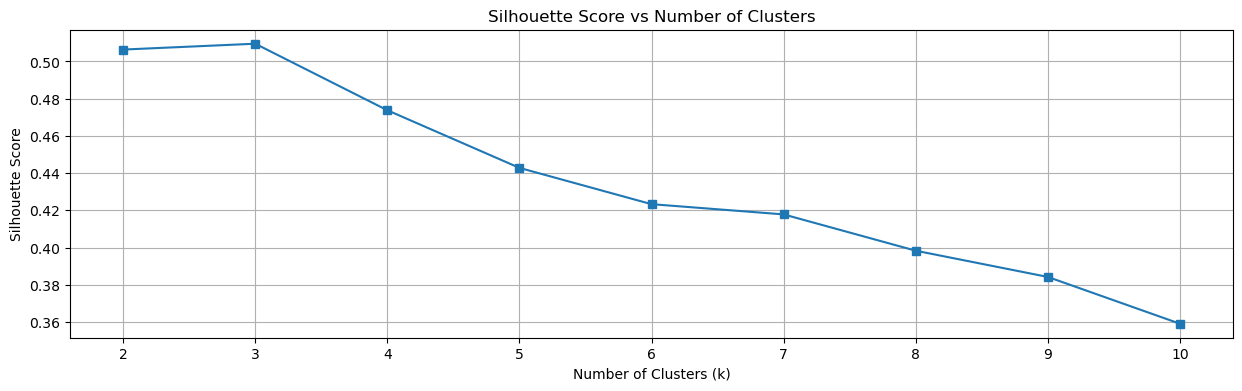

In [56]:
plt.figure(figsize=(15,4))
plt.plot(K_range,silhouette_scores,marker='s')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

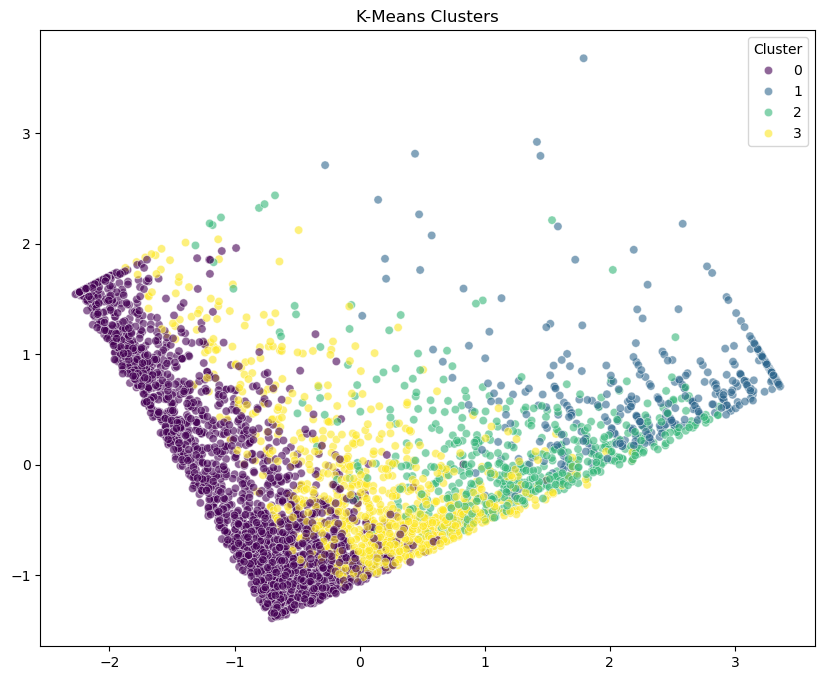

In [57]:
# Visualize clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=rfm["Cluster"], palette="viridis",alpha=0.6)
plt.title("K-Means Clusters")
plt.show()

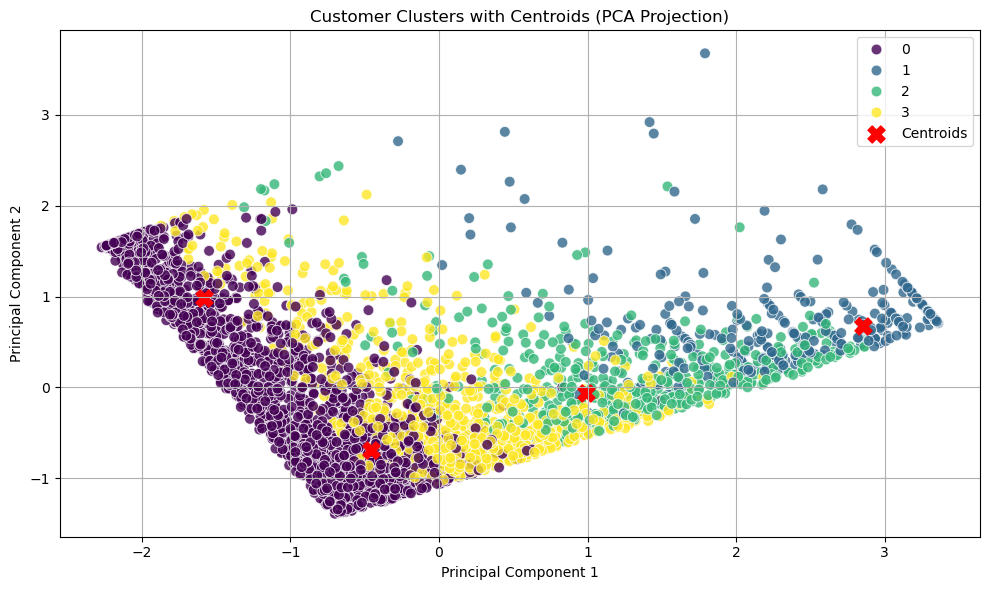

In [58]:
# Plot cluster centroids

# Apply PCA to RFM-scaled data and centroids
kmeans = KMeans(n_clusters=4,random_state=42)
y_means = kmeans.fit_predict(rfm_scaled)

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Create a DataFrame for plotting
rfm_pca_df = pd.DataFrame(rfm_pca, columns=['PC1', 'PC2'])
rfm_pca_df['Cluster'] = rfm['Cluster'].values

# Plot clusters + centroids
plt.figure(figsize=(10, 6))

# Plot the clusters
sns.scatterplot(
    data=rfm_pca_df,
    x='PC1', y='PC2',
    hue='Cluster',
    palette='viridis',
    s=60,
    alpha=0.8
)

# Plot the centroids
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    c='red',
    s=150,
    marker='X',
    label='Centroids'
)

plt.title("Customer Clusters with Centroids (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Product recommendation system [item-based collaborative filtering]

In [59]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Total_amount'],
      dtype='object')

In [60]:
recom_df = data.pivot_table(index='CustomerID',values='Quantity',columns='Description',aggfunc='sum',fill_value=0)

In [61]:
recom_df

Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
CustomerID                                                                    
12346.0                                   0                               0   
12347.0                                   0                               0   
12348.0                                   0                               0   
12349.0                                   0                               0   
12350.0                                   0                               0   
...                                     ...                             ...   
18280.0                                   0                               0   
18281.0                                   0                               0   
18282.0                                   0                               0   
18283.0                                   0                               0   
18287.0                                   0                               0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
CustomerID                                                      
12346.0                       0                             0   
12347.0                       0                             0   
12348.0                       0                             0   
12349.0                       0                             0   
12350.0                       0                             0   
...                         ...                           ...   
18280.0                       0                             0   
18281.0                       0                             0   
18282.0                       0                             0   
18283.0                       0                             0   
18287.0                       0                             0   

Description   I LOVE LONDON MINI RUCKSACK   NINE DRAWER OFFICE TIDY  \
CustomerID                                                            
12346.0                                 0                         0   
12347.0                                 0                         0   
12348.0                                 0                         0   
12349.0                                 0                         0   
12350.0                                 0                         0   
...                                   ...                       ...   
18280.0                                 0                         0   
18281.0                                 0                         0   
18282.0                                 0                         0   
18283.0                                 0                         0   
18287.0                                 0                         0   

Description   OVAL WALL MIRROR DIAMANTE    RED SPOT GIFT BAG LARGE  \
CustomerID                                                           
12346.0                                0                         0   
12347.0                                0                         0   
12348.0                                0                         0   
12349.0                                0                         0   
12350.0                                0                         0   
...                                  ...                       ...   
18280.0                                0                         0   
18281.0                                0                         0   
18282.0                                0                         0   
18283.0                                0                         1   
18287.0                                0                         0   

Description   SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  ...  \
CustomerID                                                              ...   
12346.0                                     0                        0  ...   
12347.0                                     0         

In [62]:
recom_df.columns

Index([' 4 PURPLE FLOCK DINNER CANDLES', ' 50'S CHRISTMAS GIFT BAG LARGE',
       ' DOLLY GIRL BEAKER', ' I LOVE LONDON MINI BACKPACK',
       ' I LOVE LONDON MINI RUCKSACK', ' NINE DRAWER OFFICE TIDY',
       ' OVAL WALL MIRROR DIAMANTE ', ' RED SPOT GIFT BAG LARGE',
       ' SET 2 TEA TOWELS I LOVE LONDON ', ' SPACEBOY BABY GIFT SET',
       ...
       'ZINC STAR T-LIGHT HOLDER ', 'ZINC SWEETHEART SOAP DISH',
       'ZINC SWEETHEART WIRE LETTER RACK', 'ZINC T-LIGHT HOLDER STAR LARGE',
       'ZINC T-LIGHT HOLDER STARS LARGE', 'ZINC T-LIGHT HOLDER STARS SMALL',
       'ZINC TOP  2 DOOR WOODEN SHELF ', 'ZINC WILLIE WINKIE  CANDLE STICK',
       'ZINC WIRE KITCHEN ORGANISER', 'ZINC WIRE SWEETHEART LETTER TRAY'],
      dtype='object', name='Description', length=3877)

In [63]:
s = np.array(recom_df.columns)
s

array([' 4 PURPLE FLOCK DINNER CANDLES', " 50'S CHRISTMAS GIFT BAG LARGE",
       ' DOLLY GIRL BEAKER', ..., 'ZINC WILLIE WINKIE  CANDLE STICK',
       'ZINC WIRE KITCHEN ORGANISER', 'ZINC WIRE SWEETHEART LETTER TRAY'],
      dtype=object)

In [64]:
column_name = []
for i in s:
    column_name.append(str.strip(i))
column_name

['4 PURPLE FLOCK DINNER CANDLES',
 "50'S CHRISTMAS GIFT BAG LARGE",
 'DOLLY GIRL BEAKER',
 'I LOVE LONDON MINI BACKPACK',
 'I LOVE LONDON MINI RUCKSACK',
 'NINE DRAWER OFFICE TIDY',
 'OVAL WALL MIRROR DIAMANTE',
 'RED SPOT GIFT BAG LARGE',
 'SET 2 TEA TOWELS I LOVE LONDON',
 'SPACEBOY BABY GIFT SET',
 'TOADSTOOL BEDSIDE LIGHT',
 'TRELLIS COAT RACK',
 '10 COLOUR SPACEBOY PEN',
 '12 COLOURED PARTY BALLOONS',
 '12 DAISY PEGS IN WOOD BOX',
 '12 EGG HOUSE PAINTED WOOD',
 '12 HANGING EGGS HAND PAINTED',
 '12 IVORY ROSE PEG PLACE SETTINGS',
 '12 MESSAGE CARDS WITH ENVELOPES',
 '12 PENCIL SMALL TUBE WOODLAND',
 '12 PENCILS SMALL TUBE RED RETROSPOT',
 '12 PENCILS SMALL TUBE SKULL',
 '12 PENCILS TALL TUBE POSY',
 '12 PENCILS TALL TUBE RED RETROSPOT',
 '12 PENCILS TALL TUBE SKULLS',
 '12 PENCILS TALL TUBE WOODLAND',
 '12 PINK HEN+CHICKS IN BASKET',
 '12 PINK ROSE PEG PLACE SETTINGS',
 '12 RED ROSE PEG PLACE SETTINGS',
 '15 PINK FLUFFY CHICKS IN BOX',
 '15CM CHRISTMAS GLASS BALL 20 LIGHTS',
 '16 P

In [65]:
from sklearn.metrics.pairwise import cosine_similarity

In [66]:
cos_np_array = cosine_similarity(recom_df.T,recom_df.T)

In [67]:
cos_np_array

array([[1.00000000e+00, 0.00000000e+00, 2.10108211e-05, ...,
        1.31283358e-02, 0.00000000e+00, 2.59367717e-03],
       [0.00000000e+00, 1.00000000e+00, 3.53349047e-03, ...,
        1.12377488e-02, 0.00000000e+00, 2.97932034e-02],
       [2.10108211e-05, 3.53349047e-03, 1.00000000e+00, ...,
        8.22946311e-01, 9.68952136e-05, 6.66531857e-03],
       ...,
       [1.31283358e-02, 1.12377488e-02, 8.22946311e-01, ...,
        1.00000000e+00, 6.98581182e-03, 2.46096087e-02],
       [0.00000000e+00, 0.00000000e+00, 9.68952136e-05, ...,
        6.98581182e-03, 1.00000000e+00, 1.19612129e-01],
       [2.59367717e-03, 2.97932034e-02, 6.66531857e-03, ...,
        2.46096087e-02, 1.19612129e-01, 1.00000000e+00]])

In [68]:
cos_df = pd.DataFrame(cos_np_array,index=column_name,columns=column_name)

In [69]:
cos_df

4 PURPLE FLOCK DINNER CANDLES  \
4 PURPLE FLOCK DINNER CANDLES                          1.000000   
50'S CHRISTMAS GIFT BAG LARGE                          0.000000   
DOLLY GIRL BEAKER                                      0.000021   
I LOVE LONDON MINI BACKPACK                            0.000227   
I LOVE LONDON MINI RUCKSACK                            0.000000   
...                                                         ...   
ZINC T-LIGHT HOLDER STARS SMALL                        0.002846   
ZINC TOP  2 DOOR WOODEN SHELF                          0.000000   
ZINC WILLIE WINKIE  CANDLE STICK                       0.013128   
ZINC WIRE KITCHEN ORGANISER                            0.000000   
ZINC WIRE SWEETHEART LETTER TRAY                       0.002594   

                                  50'S CHRISTMAS GIFT BAG LARGE  \
4 PURPLE FLOCK DINNER CANDLES                          0.000000   
50'S CHRISTMAS GIFT BAG LARGE                          1.000000   
DOLLY GIRL BEAKER                                      0.003533   
I LOVE LONDON MINI BACKPACK                            0.004001   
I LOVE LONDON MINI RUCKSACK                            0.000000   
...                                                         ...   
ZINC T-LIGHT HOLDER STARS SMALL                        0.015710   
ZINC TOP  2 DOOR WOODEN SHELF                          0.000000   
ZINC WILLIE WINKIE  CANDLE STICK                       0.011238   
ZINC WIRE KITCHEN ORGANISER                            0.000000   
ZINC WIRE SWEETHEART LETTER TRAY                       0.029793   

                                  DOLLY GIRL BEAKER  \
4 PURPLE FLOCK DINNER CANDLES              0.000021   
50'S CHRISTMAS GIFT BAG LARGE              0.003533   
DOLLY GIRL BEAKER                          1.000000   
I LOVE LONDON MINI BACKPACK                0.870851   
I LOVE LONDON MINI RUCKSACK                0.980561   
...                                             ...   
ZINC T-LIGHT HOLDER STARS SMALL            0.525860   
ZINC TOP  2 DOOR WOODEN SHELF              0.000000   
ZINC WILLIE WINKIE  CANDLE STICK           0.822946   
ZINC WIRE KITCHEN ORGANISER                0.000097   
ZINC WIRE SWEETHEART LETTER TRAY           0.006665   

                                  I LOVE LONDON MINI BACKPACK  \
4 PURPLE FLOCK DINNER CANDLES                        0.000227   
50'S CHRISTMAS GIFT BAG LARGE                        0.004001   
DOLLY GIRL BEAKER                                    0.870851   
I LOVE LONDON MINI BACKPACK                          1.000000   
I LOVE LONDON MINI RUCKSACK                          0.883883   
...                                                       ...   
ZINC T-LIGHT HOLDER STARS SMALL                      0.471717   
ZINC TOP  2 DOOR WOODEN SHELF                        0.000000   
ZINC WILLIE WINKIE  CANDLE STICK                     0.749210   
ZINC WIRE KITCHEN ORGANISER                          0.000000   
ZINC WIRE SWEETHEART LETTER TRAY                     0.010393   

                                  I LOVE LONDON MINI RUCKSACK  \
4 PURPLE FLOCK DINNER CANDLES                        0.000000   
50'S CHRISTMAS GIFT BAG LARGE                        0.000000   
DOLLY GIRL BEAKER                                    0.980561   
I LOVE LONDON MINI BACKPACK                          0.883883   
I LOVE LONDON MINI RUCKSACK                          1.000000   
...                                                       ...   
ZINC T-LIGHT HOLDER STARS SMALL                      0.530836   
ZINC TOP  2 DOOR WOODEN SHELF                        0.000000   
ZINC WILLIE WINKIE  CANDLE STICK                     0.837170   
ZINC WIRE KITCHEN ORGANISER                          0.000000   
ZINC WIRE SWEETHEART LETTER TRAY                     0.000000   

                                  NINE DRAWER OFFICE TIDY  \
4 PURPLE FLOCK DINNER CANDLES                    0.000000   
50'S CHRISTMAS GIFT BAG LARGE                    0.020034   
DOLLY GIRL BEAKER 

In [70]:
cos_df.columns

Index(['4 PURPLE FLOCK DINNER CANDLES', '50'S CHRISTMAS GIFT BAG LARGE',
       'DOLLY GIRL BEAKER', 'I LOVE LONDON MINI BACKPACK',
       'I LOVE LONDON MINI RUCKSACK', 'NINE DRAWER OFFICE TIDY',
       'OVAL WALL MIRROR DIAMANTE', 'RED SPOT GIFT BAG LARGE',
       'SET 2 TEA TOWELS I LOVE LONDON', 'SPACEBOY BABY GIFT SET',
       ...
       'ZINC STAR T-LIGHT HOLDER', 'ZINC SWEETHEART SOAP DISH',
       'ZINC SWEETHEART WIRE LETTER RACK', 'ZINC T-LIGHT HOLDER STAR LARGE',
       'ZINC T-LIGHT HOLDER STARS LARGE', 'ZINC T-LIGHT HOLDER STARS SMALL',
       'ZINC TOP  2 DOOR WOODEN SHELF', 'ZINC WILLIE WINKIE  CANDLE STICK',
       'ZINC WIRE KITCHEN ORGANISER', 'ZINC WIRE SWEETHEART LETTER TRAY'],
      dtype='object', length=3877)

In [71]:
def product_recommedation(T HOLDER', 'ZINC product_name,cos_df,top_n=6):
    if product_name not in cos_df.columns:
        return f"Product '{product_name}' not found in dataset."
    products = cos_df[product_name].sort_values(ascending=False)
    top_products = products.iloc[1:top_n]
    return top_products

In [72]:
product_recommedation('DOLLY GIRL BEAKER', cos_df)

SPACEBOY BEAKER                       0.991035
ROUND SNACK BOXES SET OF4 WOODLAND    0.983787
FOOD CONTAINER SET 3 LOVE HEART       0.983269
SET 12 COLOURING PENCILS DOILEY       0.980561
SET 36 COLOURING PENCILS DOILEY       0.980561
Name: DOLLY GIRL BEAKER, dtype: float64

In [73]:
# Save model

import pickle

# Save KMeans model
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Save Scaler used for RFM
with open('rfm_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('Product_recommendation.pkl', 'wb') as f:
    pickle.dump(cos_df,f)